In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 = pd.read_csv("../data/NABIL_2000-01-01_2021-12-31.csv")
df_2 = pd.read_csv("../data/nepsealpha_export_price_NABIL_2022-01-01_2024-11-21.csv")
# df_3 = pd.read_csv("Nabil Bank/Stock Trading of Nabil Bank Limited.csv")

In [3]:
df_1.head()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max. Price,Min. Price,Close Price
0,1,2021-12-29,3783,326139.0,477182107.7,1500.0,1450.0,1450.0
1,2,2021-12-28,1841,170269.0,253737724.2,1500.0,1479.2,1480.0
2,3,2021-12-27,2100,201767.0,306099202.3,1550.0,1485.0,1499.0
3,4,2021-12-26,2197,209837.0,320749736.3,1570.8,1506.0,1524.0
4,5,2021-12-23,832,51892.0,77043373.0,1499.0,1471.0,1485.0


In [4]:
df1= df_1.rename(columns={
    'Total Traded Amount' : 'total_transaction', 
    'Max. Price': 'high', 
    'Min. Price': 'low',
    'Close Price': 'close', 
    'Date': 'date'
})


In [5]:
df1['date']= pd.to_datetime(df1['date'])

In [6]:
print("Max: ", max(df1['date']))
print("Min: ", min(df1['date']))

Max:  2021-12-29 00:00:00
Min:  2010-04-15 00:00:00


In [7]:
df_2.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NABIL,2024-11-21,565.0,565.0,552.2,553.7,-0.59 %,"56,753.00"
1,NABIL,2024-11-20,560.0,562.0,552.0,557.0,-0.50 %,"61,578.00"
2,NABIL,2024-11-19,560.0,568.0,557.0,559.8,-0.41 %,"84,892.00"
3,NABIL,2024-11-17,562.0,570.0,562.0,562.1,0.02 %,"62,749.00"
4,NABIL,2024-11-14,566.0,566.0,557.0,562.0,0.18 %,"59,666.00"


In [8]:
df2=df_2.rename(columns={
    'Date':'date', 
    'Open': 'open', 
    'High': 'high', 
    'Low': 'low',
    'Close': 'close',
    'Volume': 'total_transaction'
})

In [9]:
df2['date']= pd.to_datetime(df2['date'])

In [10]:
print("Max: ", max(df2['date']))
print("Min: ", min(df2['date']))

Max:  2024-11-21 00:00:00
Min:  2022-01-02 00:00:00


In [11]:
df2[df2['date']=='2022-1-2']

,Symbol,date,open,high,low,close,Percent Change,total_transaction
675,NABIL,2022-01-02,1107.0,1151.5,1086.0,1144.0,5.41 %,"263,845.00"


In [12]:
merged_df = pd.concat([df1, df2], ignore_index=True)
filtered_df= merged_df[['date', 'high', 'low', 'close', 'total_transaction']].sort_values(by='date')
filtered_df

,date,high,low,close,total_transaction
2647,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2648,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2646,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2645,2010-04-19,2039.0,2000.0,2001.0,3549542.0
2644,2010-04-20,1975.0,1945.0,1945.0,2369304.0
...,...,...,...,...,...
2653,2024-11-14,566.0,557.0,562.0,"59,666.00"
2652,2024-11-17,570.0,562.0,562.1,"62,749.00"
2651,2024-11-19,568.0,557.0,559.8,"84,892.00"
2650,2024-11-20,562.0,552.0,557.0,"61,578.00"


In [13]:
filtered_df.to_csv("../data/Nabil_Stock_Trading.csv", index=False)

In [14]:
filtered_df[filtered_df['date']=='2022-1-2']

,date,high,low,close,total_transaction
3324,2022-01-02,1151.5,1086.0,1144.0,"263,845.00"


## Understanding data 

In [15]:
filtered_df.head()

,date,high,low,close,total_transaction
2647,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2648,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2646,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2645,2010-04-19,2039.0,2000.0,2001.0,3549542.0
2644,2010-04-20,1975.0,1945.0,1945.0,2369304.0


In [16]:
filtered_df.shape

(3325, 5)

In [17]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3325 entries, 2647 to 2649
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3325 non-null   datetime64[ns]
 1   high               3325 non-null   float64       
 2   low                3325 non-null   float64       
 3   close              3325 non-null   float64       
 4   total_transaction  3325 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 155.9+ KB


In [18]:
filtered_df['total_transaction']= filtered_df['total_transaction'].replace(",", "", regex=True)
filtered_df.info()
print(filtered_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3325 entries, 2647 to 2649
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3325 non-null   datetime64[ns]
 1   high               3325 non-null   float64       
 2   low                3325 non-null   float64       
 3   close              3325 non-null   float64       
 4   total_transaction  3325 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 155.9+ KB
date                 0
high                 0
low                  0
close                0
total_transaction    0
dtype: int64


In [19]:
filtered_df.duplicated().sum()

np.int64(3)

In [20]:
filtered_df.drop_duplicates(keep='first', inplace=True)
filtered_df.duplicated().sum()

np.int64(0)

In [21]:
filtered_df.head()

,date,high,low,close,total_transaction
2647,2010-04-15,2040.0,2000.0,2000.0,6935470.0
2645,2010-04-19,2039.0,2000.0,2001.0,3549542.0
2644,2010-04-20,1975.0,1945.0,1945.0,2369304.0
2643,2010-04-21,1908.0,1800.0,1810.0,3531917.0
2642,2010-04-22,1831.0,1775.0,1831.0,2156607.0


In [22]:
filtered_df.isna().sum()

date                 0
high                 0
low                  0
close                0
total_transaction    0
dtype: int64

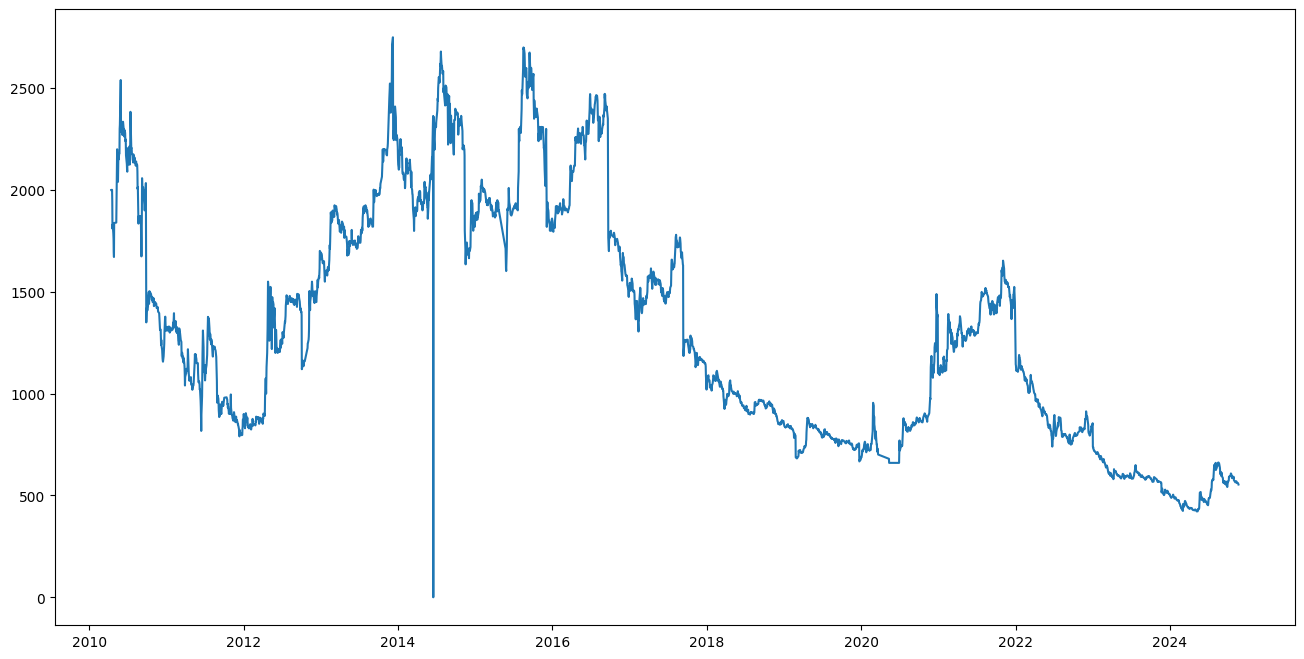

In [23]:
plt.figure(figsize=(16,8))
plt.plot(filtered_df['date'], filtered_df['close'], label="Closing Price History")
plt.show()

In [24]:
#we can see that on date '2014-06-17', so replacing the closing value 0 by using method (high + low)/2

# filtered_df[filtered_df['date']== '2014-06-17'] 

print(filtered_df[filtered_df['close']== 0])

# filtered_df.loc[filtered_df['close'] == 0]

           date    high     low  close total_transaction
1706 2014-06-17  2413.0  2310.0    0.0        15732160.0


In [25]:
# #Feature Engineering
# # Price change is the total change is closing price of today form yesterday
# filtered_df['price_change']= filtered_df['close']-filtered_df['close'].shift(1)

# # daily change is the difference between high and low of that day
# filtered_df['daily_change']= filtered_df['high']-filtered_df['low']

# # daily return is the percentage of change is closing price compared to yesterday
# filtered_df['daily_return']= (filtered_df['price_change'] / filtered_df['close'].shift(1)) * 100 
# filtered_df['daily_return']= filtered_df['daily_return'].apply(lambda x: round(x, 2))

# filtered_df.head()

In [26]:
filtered_df.isna().sum()

date                 0
high                 0
low                  0
close                0
total_transaction    0
dtype: int64

In [27]:
filtered_df.dropna(inplace=True)
filtered_df.isna().sum()

date                 0
high                 0
low                  0
close                0
total_transaction    0
dtype: int64

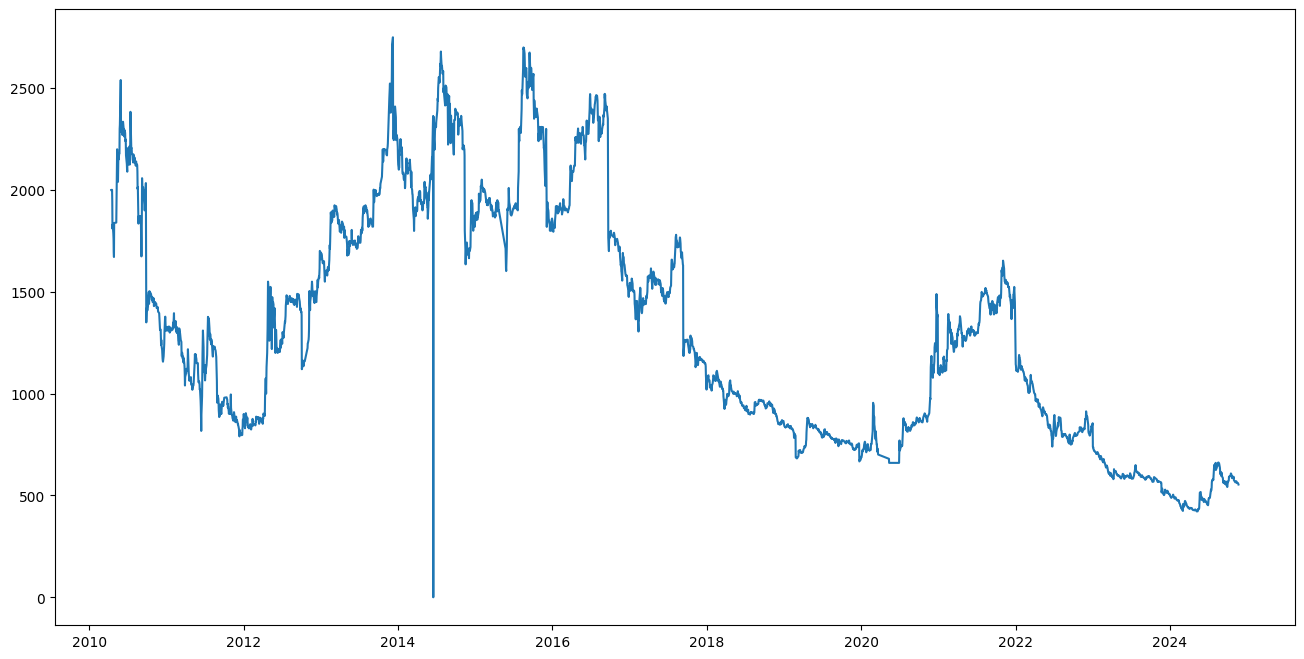

In [28]:
plt.figure(figsize=(16,8))
plt.plot(filtered_df['date'], filtered_df['close'], label="Closing Price History")
plt.show()

In [29]:
filtered_df[filtered_df['close'] == min(filtered_df['close'])]

,date,high,low,close,total_transaction
1706,2014-06-17,2413.0,2310.0,0.0,15732160.0


In [30]:
filtered_df[(filtered_df['date']>='2014-06-16') & (filtered_df['date']<='2014-06-18')]

,date,high,low,close,total_transaction
1707,2014-06-16,2380.0,2312.0,2363.0,26233620.0
1706,2014-06-17,2413.0,2310.0,0.0,15732160.0
1705,2014-06-18,2370.0,2335.0,2360.0,5454785.0


In [31]:
#we can see that on date '2014-06-17', so replacing the closing value 0 by using forward fill method

filtered_df['close']= filtered_df['close'].replace(0, method='ffill')

/var/folders/_0/nzc90x3n5rq0qtcpn10r9hkm0000gn/T/ipykernel_16951/1402038004.py:3: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  filtered_df['close']= filtered_df['close'].replace(0, method='ffill')


In [32]:

# filtered_df[filtered_df['date']== '2014-06-17'] 

print(filtered_df[filtered_df['close']== 0])


Empty DataFrame
Columns: [date, high, low, close, total_transaction]
Index: []


In [33]:
#Feature Engineering
# Price change is the total change is closing price of today form yesterday
filtered_df['price_change']= filtered_df['close']-filtered_df['close'].shift(1)

# daily change is the difference between high and low of that day
filtered_df['daily_change']= filtered_df['high']-filtered_df['low']

# daily return is the percentage of change is closing price compared to yesterday
filtered_df['daily_return']= (filtered_df['price_change'] / filtered_df['close'].shift(1)) * 100 
filtered_df['daily_return']= filtered_df['daily_return'].apply(lambda x: round(x, 2))

filtered_df.head()

,date,high,low,close,total_transaction,price_change,daily_change,daily_return
2647,2010-04-15,2040.0,2000.0,2000.0,6935470.0,NaN,40.0,NaN
2645,2010-04-19,2039.0,2000.0,2001.0,3549542.0,1.0,39.0,0.05
2644,2010-04-20,1975.0,1945.0,1945.0,2369304.0,-56.0,30.0,-2.80
2643,2010-04-21,1908.0,1800.0,1810.0,3531917.0,-135.0,108.0,-6.94
2642,2010-04-22,1831.0,1775.0,1831.0,2156607.0,21.0,56.0,1.16


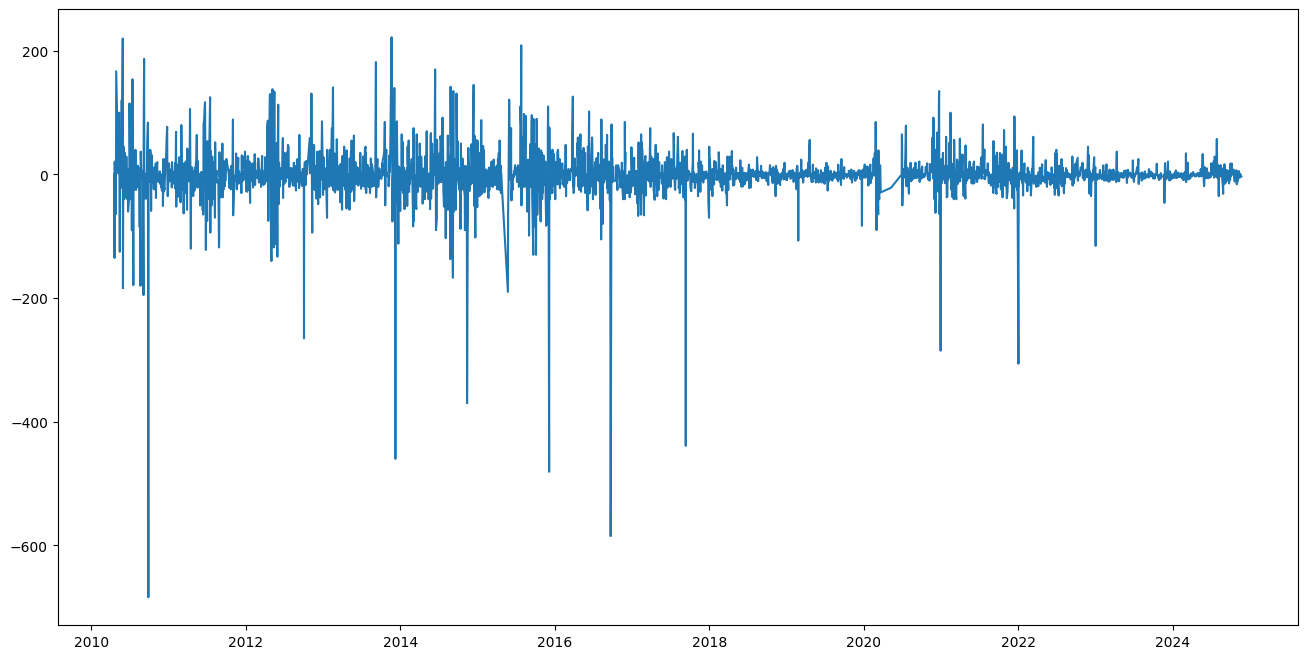

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(filtered_df['date'], filtered_df['price_change'])
plt.show()

In [35]:
#seperating date into year, month, weekday
filtered_df['year']= filtered_df['date'].dt.year
filtered_df['month']= filtered_df['date'].dt.month
filtered_df['day-of-week']= filtered_df['date'].dt.dayofweek # 0 for monday 6 for sunday
filtered_df['is-weekend']= filtered_df['day-of-week'].apply(lambda x: 0 if x!=6 else 1) #in case of nepal only saturday is considered to be public holiday


filtered_df.head()

,date,high,low,close,total_transaction,price_change,daily_change,daily_return,year,month,day-of-week,is-weekend
2647,2010-04-15,2040.0,2000.0,2000.0,6935470.0,NaN,40.0,NaN,2010,4,3,0
2645,2010-04-19,2039.0,2000.0,2001.0,3549542.0,1.0,39.0,0.05,2010,4,0,0
2644,2010-04-20,1975.0,1945.0,1945.0,2369304.0,-56.0,30.0,-2.80,2010,4,1,0
2643,2010-04-21,1908.0,1800.0,1810.0,3531917.0,-135.0,108.0,-6.94,2010,4,2,0
2642,2010-04-22,1831.0,1775.0,1831.0,2156607.0,21.0,56.0,1.16,2010,4,3,0


In [36]:
#setting up some technical indicators for stock market  
def compute_rsi(data, window=14):
    delta= data.diff(1)
    
    gain= delta.where(delta>0, 0) #keeping inly positive gains
    loss= delta.where(delta<0, 0) #keeping only negative losses
    
    # Use Exponential Moving Average (EMA) for smoothing
    avg_gain= gain.ewm(span=window, adjust=False).mean()
    avg_loss = loss.ewm(span=window, adjust=False).mean()
    
     # Compute Relative Strength (RS) and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
    

In [37]:
filtered_df['SMA-10']= filtered_df['close'].rolling(window=10).mean() #average of 10 consecutive days
filtered_df['SMA-50']= filtered_df['close'].rolling(window=50).mean() #average of 50 days

filtered_df['EMA_10']= filtered_df['close'].ewm(span=10, adjust=False).mean()
filtered_df['EMA_50']= filtered_df['close'].ewm(span=50, adjust=False).mean()

filtered_df['RSI_14'] = compute_rsi(filtered_df['close'], window=14) 

filtered_df['close_prev_day'] = filtered_df['close'].shift(1)

filtered_df.head()

,date,high,low,close,total_transaction,price_change,daily_change,daily_return,year,month,day-of-week,is-weekend,SMA-10,SMA-50,EMA_10,EMA_50,RSI_14,close_prev_day
2647,2010-04-15,2040.0,2000.0,2000.0,6935470.0,NaN,40.0,NaN,2010,4,3,0,NaN,NaN,2000.000000,2000.000000,NaN,NaN
2645,2010-04-19,2039.0,2000.0,2001.0,3549542.0,1.0,39.0,0.05,2010,4,0,0,NaN,NaN,2000.181818,2000.039216,100.000000,2000.0
2644,2010-04-20,1975.0,1945.0,1945.0,2369304.0,-56.0,30.0,-2.80,2010,4,1,0,NaN,NaN,1990.148760,1997.880815,-1.571947,2001.0
2643,2010-04-21,1908.0,1800.0,1810.0,3531917.0,-135.0,108.0,-6.94,2010,4,2,0,NaN,NaN,1957.394440,1990.512940,-0.410932,1945.0
2642,2010-04-22,1831.0,1775.0,1831.0,2156607.0,21.0,56.0,1.16,2010,4,3,0,NaN,NaN,1934.413633,1984.257531,-15.756324,1810.0


In [38]:
filtered_df.isna().sum()

date                  0
high                  0
low                   0
close                 0
total_transaction     0
price_change          1
daily_change          0
daily_return          1
year                  0
month                 0
day-of-week           0
is-weekend            0
SMA-10                9
SMA-50               49
EMA_10                0
EMA_50                0
RSI_14                1
close_prev_day        1
dtype: int64

In [39]:
filtered_df[filtered_df['total_transaction'].isna()]

,date,high,low,close,total_transaction,price_change,daily_change,daily_return,year,month,day-of-week,is-weekend,SMA-10,SMA-50,EMA_10,EMA_50,RSI_14,close_prev_day


In [40]:
filtered_df.to_csv("../data/processed/filtered_stock_with_indicators.csv", index=False)
